In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import os 
sns.set()

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

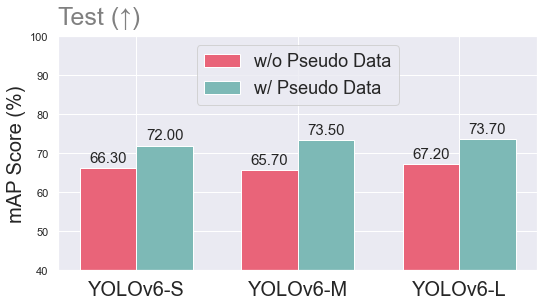

In [20]:
#labels = ['Baseline', 'MaskSup']
labels = ['YOLOv6-S', 'YOLOv6-M', 'YOLOv6-L']

# VOC
auc = [66.3, 65.7, 67.2] # base
acc_nst = [72, 73.5, 73.7]

# COCO
#auc = [60.6,63.8,63.2] # base
#acc_nst = [65.4,68.6,67.3]

x = np.arange(len(labels))  # the label locations
dummy = np.arange(10)

width = 0.35 #0.4  # the width of the bars



fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, auc, width, label='w/o Pseudo Data', color='#E96479') # #FFAE6D
rects2 = ax.bar(x + width/2, acc_nst, width, label='w/ Pseudo Data', color='#7DB9B6') # #9ED2C6
#rects211 = ax.bar(x + width/2 * 3.08, acc, width, label='CF1')

ax.set_ylabel('mAP Score (%)', fontsize=20)
#ax.set_title('Results')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, fontsize=20)

#for i in range(18):
#    ax.get_xticklabels()[i].set_color("white")

#ax.set_ylim([30,80]) # coc
ax.set_ylim([40,100]) # voc

#ax.legend(loc="upper left", prop={'size': 14})
ax.grid(True)
#ax.patch.set_facecolor('white')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0, fontsize=15)
        #ax.set_ylim(ymin=1)
        

def autolabel_(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0, fontsize=15)
        #ax.set_ylim(ymin=1)


autolabel(rects1) # %
autolabel(rects2)
#autolabel_(rects211) # %

fig.tight_layout()
fig.set_size_inches(8, 4, forward=True)
#plt.title('MS-COCO (\u2191)', loc='left', fontsize=25, color='gray', pad=12)
plt.title('Test (\u2191)', loc='left', fontsize=25, color='gray', pad=12)
plt.legend(loc='upper center', fontsize=18)
plt.savefig("./test_pseudo_data.pdf", bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

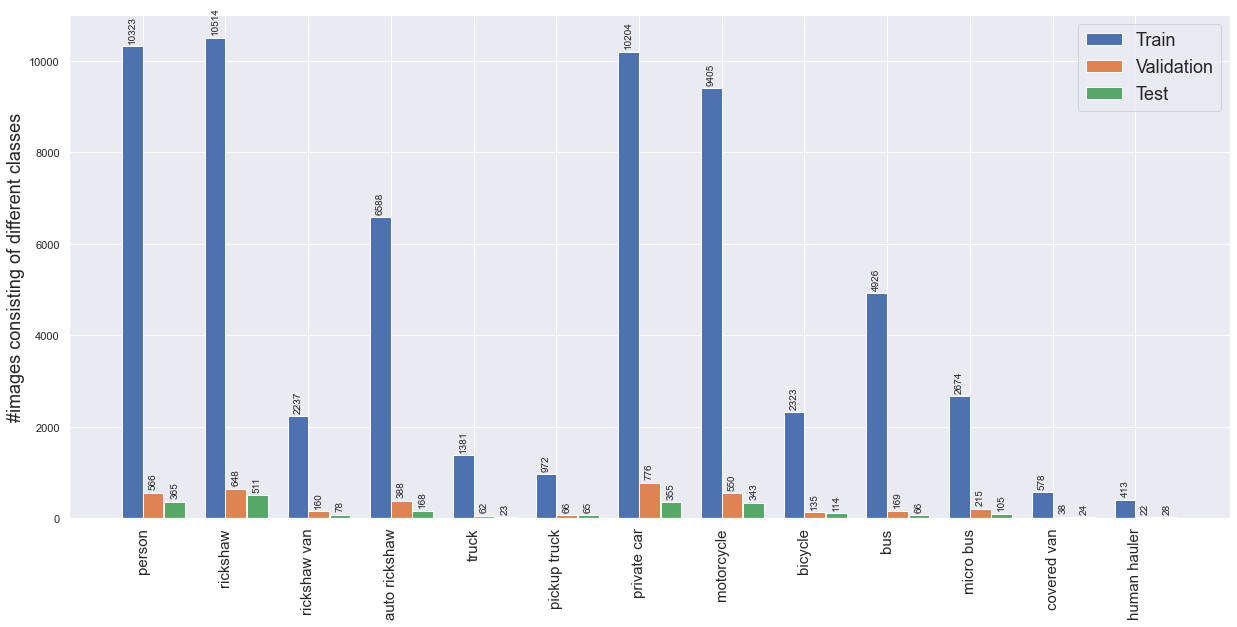

In [40]:
labels = ['SSS', 'ESS', 'SIZ']
labels = ['person', 
              'rickshaw', 
              'rickshaw van', 
              'auto rickshaw', 
              'truck', 
              'pickup truck', 
              'private car', 
              'motorcycle', 
              'bicycle', 
              'bus', 
              'micro bus', 
              'covered van', 
              'human hauler'
              ]


# Val
auc = [566,648,160,388,62,66,776,550,135,169,215,38,22]
acc_nst = [365,511,78,168,23,65,355,343,114,66,105,24,28]
acc = [10323,10514,2237,6588,1381,972,10204,9405,2323,4926,2674,578,413]


# Test

# auc = [75, 94.74, 81.48, 78.57, 50, 90.91, 72, 94.12, 80, 96, 89.66, 91.67, 78.26, 87.50, 78.57, 92.86, 88.89, 75]
# acc_nst = [75, 94.74, 88.89, 81.48, 66.67, 95.24, 76.92, 94.74, 76.19, 100, 85.71, 90.91, 83.33, 82.35, 93.33, 92.86, 96.30, 78.26]
# acc = [80, 80, 84.62, 85.71, 100, 100, 78.57, 94.12, 90.31, 100, 88.89, 91.67, 84.62, 94.12, 89.66, 96.30, 96.30, 86.96]

x = np.arange(len(labels))  # the label locations
dummy = np.arange(10)

width = 0.25 #0.4  # the width of the bars

fig, ax = plt.subplots()


#rects1 = ax.bar(x - width/2, auc, width, label='Validation')
#rects2 = ax.bar(x + width/2, acc_nst, width, label='Test')
#rects211 = ax.bar(x + width/2 * 3.08, acc, width, label='Train')
rects1 = ax.bar(x - width/2, acc, width, label='Train')
rects2 = ax.bar(x + width/2, auc, width, label='Validation')
rects211 = ax.bar(x + width/2 * 3.08, acc_nst, width, label='Test')

ax.set_ylabel('#images consisting of different classes', fontsize=18)
#ax.set_title('Results')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize=15)

#for i in range(18):
#    ax.get_xticklabels()[i].set_color("white")

ax.set_ylim([0, 11000])
ax.legend(loc=(0,0))
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)
        #ax.set_ylim(ymin=1)
        

def autolabel_(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)
        #ax.set_ylim(ymin=1)


autolabel_(rects211) # %
autolabel(rects1) # %
autolabel(rects2)


fig.tight_layout()
fig.set_size_inches(20, 14, forward=True)
#plt.legend()
plt.legend(loc='upper right', fontsize=18)
plt.savefig("./images_with_classes.pdf", bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

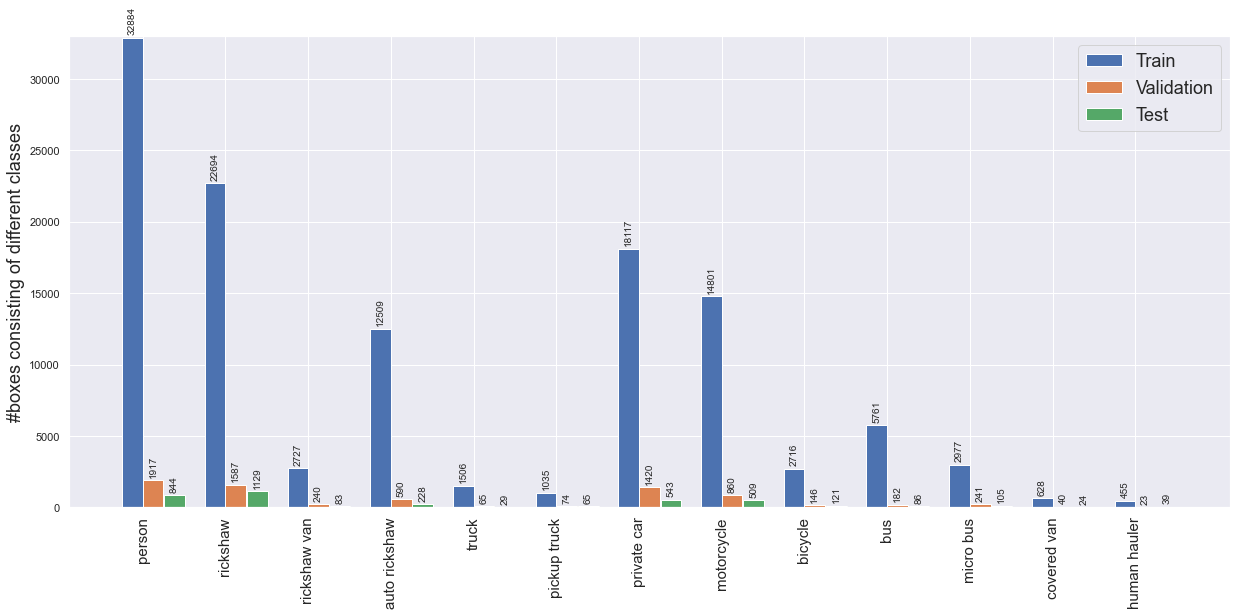

In [39]:
labels = ['SSS', 'ESS', 'SIZ']
labels = ['person', 
              'rickshaw', 
              'rickshaw van', 
              'auto rickshaw', 
              'truck', 
              'pickup truck', 
              'private car', 
              'motorcycle', 
              'bicycle', 
              'bus', 
              'micro bus', 
              'covered van', 
              'human hauler'
              ]


# Val
auc = [1917,1587,240,590,65,74,1420,860,146,182,241,40,23]
acc_nst = [844,1129,83,228,29,65,543,509,121,86,105,24,39]
acc = [32884,22694,2727,12509,1506,1035,18117,14801,2716,5761,2977,628,455]


# Test

# auc = [75, 94.74, 81.48, 78.57, 50, 90.91, 72, 94.12, 80, 96, 89.66, 91.67, 78.26, 87.50, 78.57, 92.86, 88.89, 75]
# acc_nst = [75, 94.74, 88.89, 81.48, 66.67, 95.24, 76.92, 94.74, 76.19, 100, 85.71, 90.91, 83.33, 82.35, 93.33, 92.86, 96.30, 78.26]
# acc = [80, 80, 84.62, 85.71, 100, 100, 78.57, 94.12, 90.31, 100, 88.89, 91.67, 84.62, 94.12, 89.66, 96.30, 96.30, 86.96]

x = np.arange(len(labels))  # the label locations
dummy = np.arange(10)

width = 0.25 #0.4  # the width of the bars

fig, ax = plt.subplots()


#rects1 = ax.bar(x - width/2, auc, width, label='Validation')
#rects2 = ax.bar(x + width/2, acc_nst, width, label='Test')
#rects211 = ax.bar(x + width/2 * 3.08, acc, width, label='Train')
rects1 = ax.bar(x - width/2, acc, width, label='Train')
rects2 = ax.bar(x + width/2, auc, width, label='Validation')
rects211 = ax.bar(x + width/2 * 3.08, acc_nst, width, label='Test')

ax.set_ylabel('#boxes consisting of different classes', fontsize=18)
#ax.set_title('Results')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize=15)

#for i in range(18):
#    ax.get_xticklabels()[i].set_color("white")

ax.set_ylim([0, 33000])
ax.legend(loc=(0,0))
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)
        #ax.set_ylim(ymin=1)
        

def autolabel_(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)
        #ax.set_ylim(ymin=1)


autolabel_(rects211) # %
autolabel(rects1) # %
autolabel(rects2)


fig.tight_layout()
fig.set_size_inches(20, 14, forward=True)
#plt.legend()
plt.legend(loc='upper right', fontsize=18)
plt.savefig("./bboxes_with_classes.pdf", bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()